<a href="https://colab.research.google.com/github/Madhav-Jindal/Quant-Wing-2020/blob/master/Quant_Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
'''
  I have used the MACD crossover strategy for year 2017 on GOOGL stock earning a profit of 55 dollar.
  This can be certainly be improved with the use of histograms and divergence to predict better.
  I was also thinking that multiple starts, like rsi and macd may be implemented together to get a robust strategy
'''

'\n  I have used the MACD crossover strategy for year 2017 on GOOGL stock earning a profit of 55 dollars.\n  This can be certainly be improved with the use of histograms and divergence to predict better.\n  I was also thinking that multiple starts, like rsi and macd may be implemented together to get a robust strategy\n'

In [2]:
!pip install quandl

In [253]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = '5Av1EMy2LELvBBqUCpCg'
data = quandl.get_table('WIKI/PRICES',ticker='GOOGL' ,
                        qopts = { 'columns': ['date', 'adj_close'] },
                        date = { 'gte': '2017-1-1', 'lte': '2017-12-31' }, paginate=True)


data=data.reindex(index=data.index[::-1])
data

,date,adj_close
None,,
249,2017-01-03,808.01
248,2017-01-04,807.77
247,2017-01-05,813.02
246,2017-01-06,825.21
245,2017-01-09,827.18
...,...,...
4,2017-12-22,1068.86
3,2017-12-26,1065.85
2,2017-12-27,1060.20


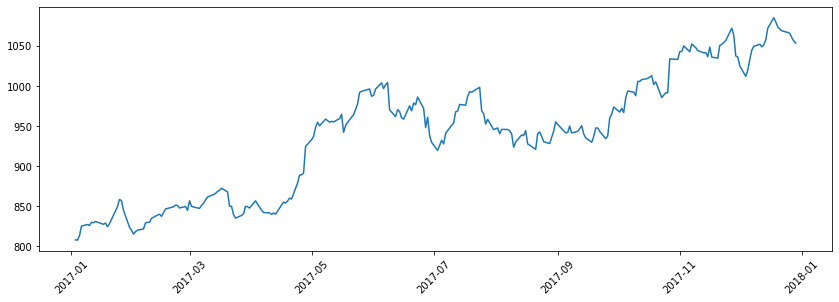

In [254]:
plt.figure(figsize=(14.2,4.5))
plt.plot(data['date'],data['adj_close'])
plt.xticks(rotation=45)
plt.show()

In [255]:
#Calculating macd and signal line

# Short term
sema=data.ewm(span=12,adjust=False).mean()

#Long term
lema=data.ewm(span=26,adjust=False).mean()

#MACD
macd=sema-lema

#Signal

signal=macd.ewm(span=9,adjust=9).mean()

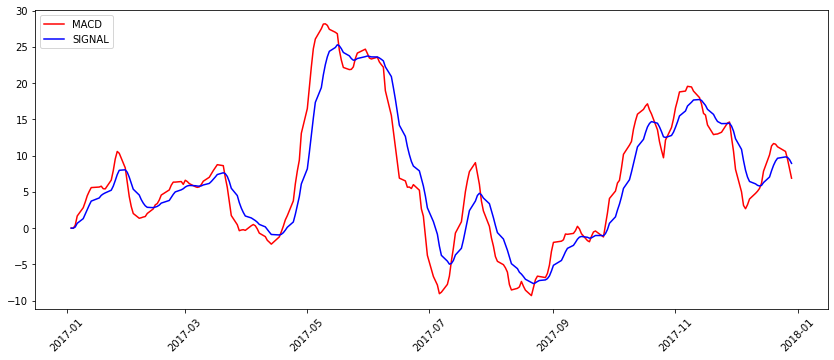

In [256]:
plt.figure(figsize=(14.2,5.5))
plt.plot(data['date'],macd,label='MACD',color='red')
plt.plot(data['date'],signal,label='SIGNAL',color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

In [257]:
data['MACD']=macd
data['SIGNAL']=signal
data.head()

,date,adj_close,MACD,SIGNAL
None,,,,
249,2017-01-03,808.01,0.000000,0.000000
248,2017-01-04,807.77,-0.019145,-0.010636
247,2017-01-05,813.02,0.384876,0.151459
246,2017-01-06,825.21,1.669453,0.665685
245,2017-01-09,827.18,2.814014,1.304764


In [258]:
#when to buy and cell asset

def bs(signal):
    b=[]
    s=[]
    flag=-1
    
    
    for i in reversed(range(0,len(signal))):
        if signal['MACD'][i]>signal['SIGNAL'][i]:
            s.append(np.nan)
            if flag!=1:
                b.append(signal['adj_close'][i])
                flag=1
            else:
                b.append(np.nan) 
        elif signal['MACD'][i]<signal['SIGNAL'][i]:
            b.append(np.nan)
            if flag!=0:
                s.append(signal['adj_close'][i])
                flag=0
            else:
                s.append(np.nan)
        else:
            s.append(np.nan)
            b.append(np.nan)
            
    # return(b[::-1],s[::-1])
    return(b,s)

In [259]:

a=bs(data)
data.head()
data['buy_signal']=a[0]
data['sell_signal']=a[1]


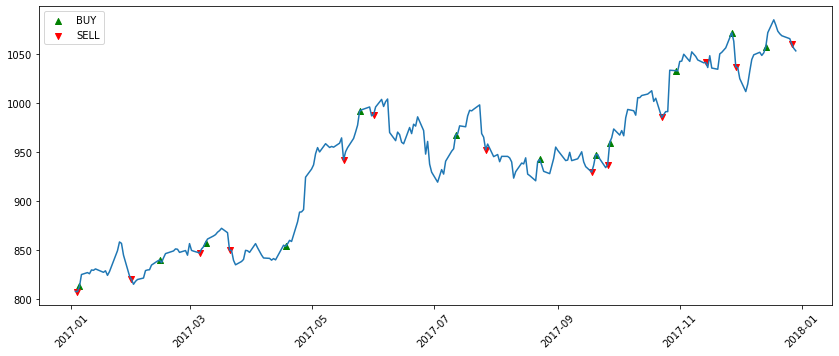

In [260]:

plt.figure(figsize=(14.2,5.5))
plt.scatter(data['date'],data['buy_signal'],label='BUY',color='green',marker='^')
plt.scatter(data['date'],data['sell_signal'],label='SELL',color='red',marker='v')
# plt.plot(data['date'],macd,label='MACD',color='red')
# plt.plot(data['date'],signal,label='SIGNAL',color='blue')
plt.plot(data['date'],data['adj_close'])
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [250]:
data


,date,adj_close,MACD,SIGNAL,buy_signal,sell_signal
None,,,,,,
249,2017-01-03,116.86,0.000000,0.000000,NaN,NaN
248,2017-01-04,118.69,0.145983,0.081102,118.69,NaN
247,2017-01-05,120.67,0.416642,0.218618,NaN,NaN
246,2017-01-06,123.41,0.842524,0.429969,NaN,NaN
245,2017-01-09,124.90,1.285452,0.684455,NaN,NaN
...,...,...,...,...,...,...
4,2017-12-22,177.20,0.202792,0.336923,NaN,NaN
3,2017-12-26,175.99,0.007779,0.271094,NaN,NaN
2,2017-12-27,177.62,-0.015069,0.213861,NaN,NaN


In [262]:
portfolio = 1000 #this is the initial money that we have with us

days = len(data)

nav = pd.DataFrame(index = data.tail(days).index) 
nav = nav.assign(leftover = np.zeros(days), stock = np.zeros(days))
nav.iloc[0,0] = portfolio
profit=0.0
flag=0
for i in reversed(range(0,len(data))):
  leftover = nav.loc[:i].tail(2).head(1).iloc[0,0]

  if not(np.isnan(data['buy_signal'][i])) and (np.isnan(data['sell_signal'][i])):
    #buys the share
    
    nav['leftover'][i]=leftover-data['buy_signal'][i]
    nav['stock'][i]=data['buy_signal'][i]
    flag=1
    #buys the share
  elif (np.isnan(data['buy_signal'][i])) and not(np.isnan(data['sell_signal'][i])):
    # sells the share
    if flag==1:
      nav['leftover'][i]=leftover+data['sell_signal'][i]
    else:
      nav['leftover'][i]=portfolio
  else:
    #hold
    if flag==1:
      nav['stock'][i]=data['adj_close'][i]
      nav['leftover'][i]=leftover



print("Profit is",nav['leftover'][0]-nav['leftover'][days-1])




Profit is 55.47999999999956
